In [149]:
# https://www.youtube.com/watch?v=0kriT6qg404
import pandas as pd
df = pd.read_csv('movies.csv')
df.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name  ... num_user_for_reviews  language  country  \
0      CCH Pounder  ...               3054.0   English      USA   
1      Johnny Depp  ...               1238.0   English      USA   
2  Christoph Waltz  ...                994.0   English       UK   
3        Tom Hardy  ...               2701.0   English      USA   
4      Doug Walker  ...                  NaN       NaN      NaN   

  content_rating       budget title_year actor_2_facebook_likes  imdb_score  \
0          PG-13  237000000.0     2009.0                  936.0         7.9   
1          PG-13  300000000.0     2007.0                 5000.0         7.1   
2          PG-13  245000000.0     2015.0                  393.0         6.8   
3          PG-13  250000000.0     2012.0                23000.0         8.5   
4            NaN          NaN        NaN                   12.0         7.1   

  aspect_ratio movie_facebook_likes  
0         1.78                33000  
1         2.35                    0  
2         2.35                85000  
3         2.35               164000  
4          NaN                    0  

[5 rows x 27 columns]

In [150]:
df.tail()

director_name  num_critic_for_reviews  duration  \
5038       Scott Smith                     1.0      87.0   
5039               NaN                    43.0      43.0   
5040  Benjamin Roberds                    13.0      76.0   
5041       Daniel Hsia                    14.0     100.0   
5042          Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes    gross                        genres  \
5038                   637.0      NaN                  Comedy|Drama   
5039                   841.0      NaN  Crime|Drama|Mystery|Thriller   
5040                     0.0      NaN         Drama|Horror|Thriller   
5041                   946.0  10443.0          Comedy|Drama|Romance   
5042                    86.0  85222.0                   Documentary   

     actor_1_name  ... num_user_for_reviews  language  country content_rating  \
5038  Eric Mabius  ...                  6.0   English   Canada            NaN   
5039  Natalie Zea  ...                359.0   English      USA          TV-14   
5040  Eva Boehnke  ...                  3.0   English      USA            NaN   
5041    Alan Ruck  ...                  9.0   English      USA          PG-13   
5042  John August  ...                 84.0   English      USA             PG   

      budget title_year actor_2_facebook_likes  imdb_score aspect_ratio  \
5038     NaN     2013.0                  470.0         7.7          NaN   
5039     NaN        NaN                  593.0         7.5        16.00   
5040  1400.0     2013.0                    0.0         6.3          NaN   
5041     NaN     2012.0                  719.0         6.3         2.35   
5042  1100.0     2004.0                   23.0         6.6         1.85   

     movie_facebook_likes  
5038                   84  
5039                32000  
5040                   16  
5041                  660  
5042                  456  

[5 rows x 27 columns]

In [151]:
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, max_error, mean_absolute_error, r2_score


In [152]:
df.shape

(5043, 27)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [154]:
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [155]:
df.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

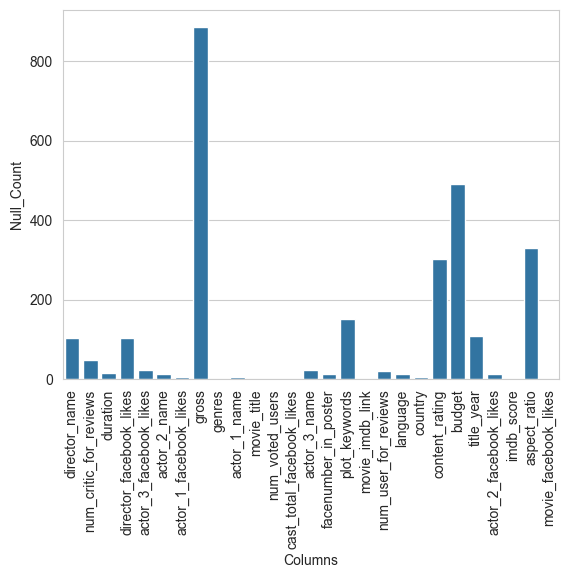

In [156]:
import matplotlib.pyplot as plt
null = pd.DataFrame(zip(df.columns, df.isnull().sum()), columns=['Columns', 'Null_Count'])
sns.barplot(x="Columns", y="Null_Count", data=null)
plt.xticks(rotation=90)
plt.show()


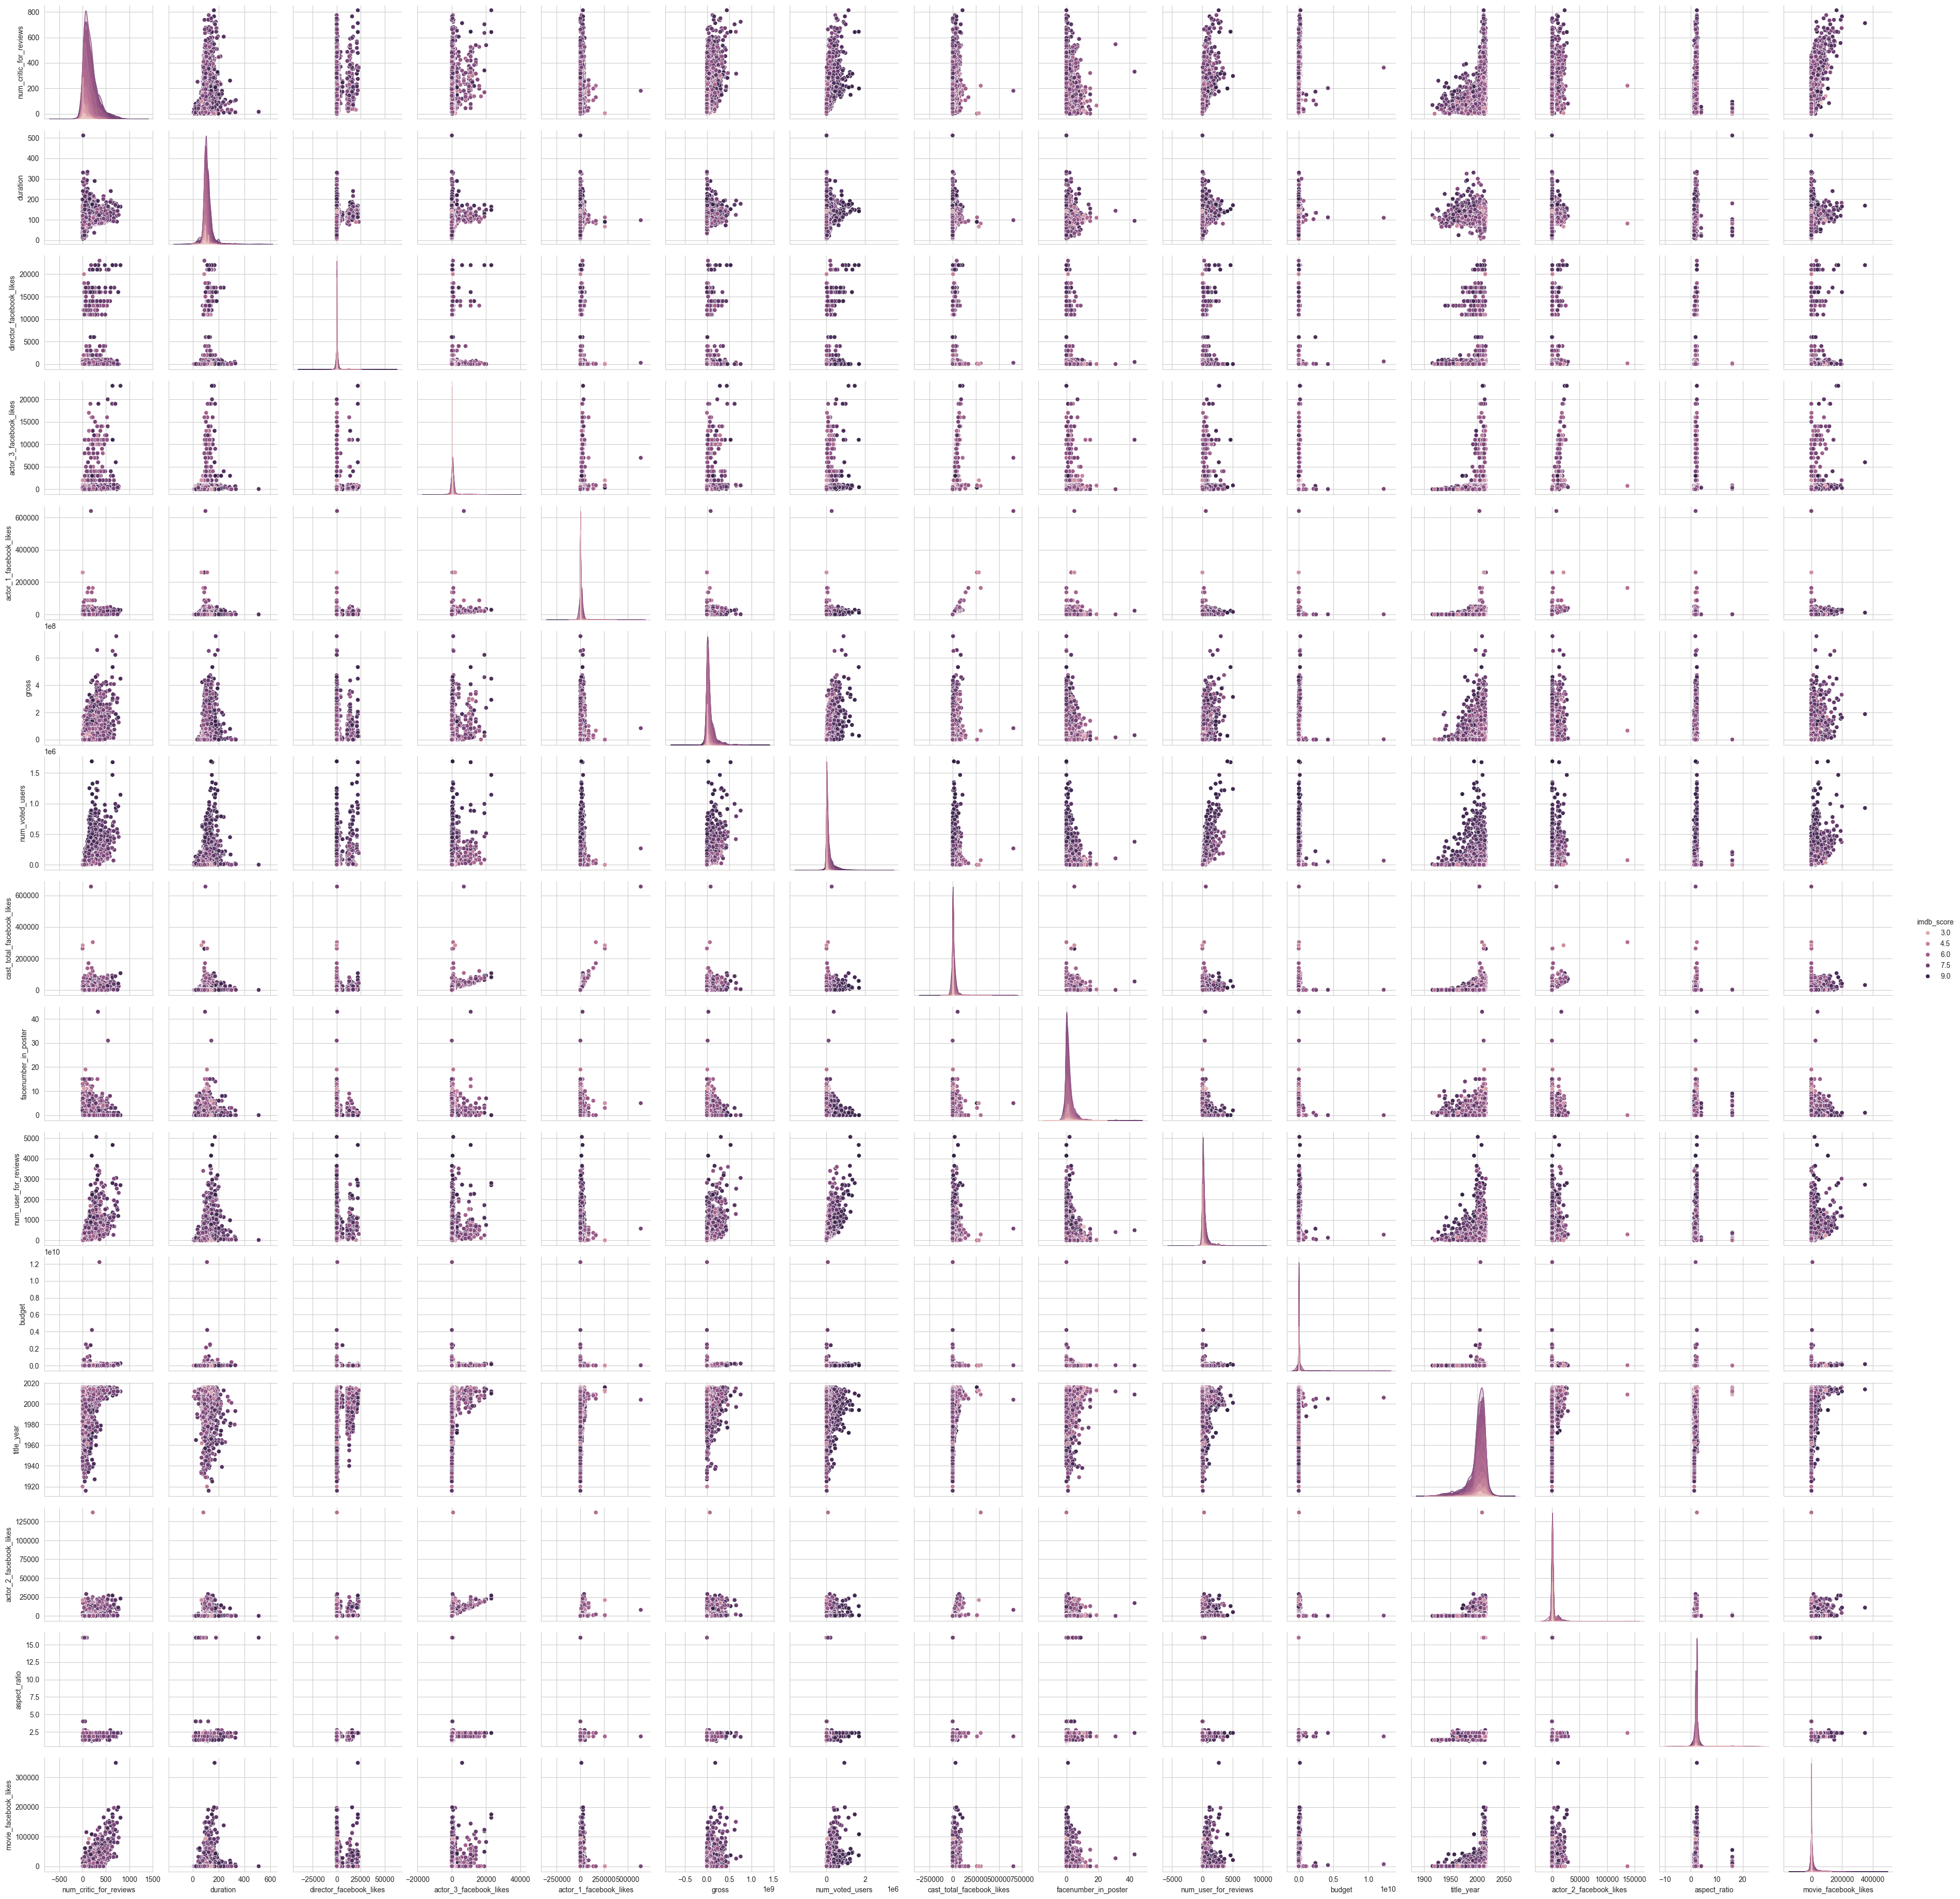

In [157]:
sns.pairplot(df, hue='imdb_score')

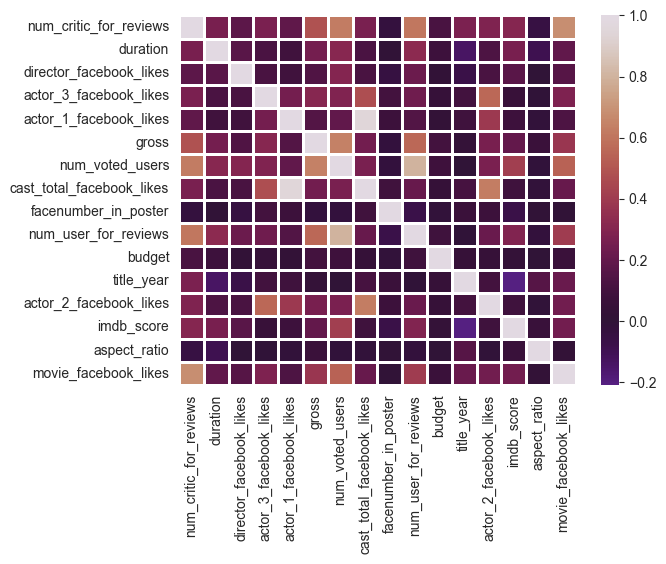

<Figure size 3000x2000 with 0 Axes>

In [158]:
numeric_df = df.select_dtypes(include=['number'])
cor = numeric_df.corr()
# select only numeric columns
sns.heatmap(cor, linewidths=1, center=0, cmap='twilight')
plt.figure(figsize=(30,20))
plt.show()

In [159]:
from scipy import stats
import pandas as pd
#
df = pd.read_csv('movies.csv')
df = df.drop(['director_name', 'num_critic_for_reviews', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'facenumber_in_poster', 'movie_imdb_link', 'country', 'content_rating', 'aspect_ratio', 'movie_facebook_likes' ], axis=1)
# df = df[['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'gross', 'genres', 'num_voted_users', 'cast_total_facebook_likes', 'plot_keywords', 'num_user_for_reviews', 'language', 'budget_year']]

df['imdb_1'] = pd.cut(df.imdb_score, bins=[0,5,10], right=True, labels=['Low', 'High'])
df['other_actors_likes'] = df['cast_total_facebook_likes'] - df['actor_1_facebook_likes'] - df['actor_2_facebook_likes'] - df['actor_3_facebook_likes']
df['genre'] = df['genres'].str.split('|').str[0]
df['keyword'] = df['plot_keywords'].str.split('|').str[0]
ord = OrdinalEncoder()
df['genre_code'] = ord.fit_transform(df[['genre']])
df.drop(df[(np.abs(stats.zscore(df['gross'])) < 3)], axis = 1)
df.head(10)

# taking both plot_keywords and genres as they are also important

duration  director_facebook_likes  actor_3_facebook_likes  \
0     178.0                      0.0                   855.0   
1     169.0                    563.0                  1000.0   
2     148.0                      0.0                   161.0   
3     164.0                  22000.0                 23000.0   
4       NaN                    131.0                     NaN   
5     132.0                    475.0                   530.0   
6     156.0                      0.0                  4000.0   
7     100.0                     15.0                   284.0   
8     141.0                      0.0                 19000.0   
9     153.0                    282.0                 10000.0   

   actor_1_facebook_likes        gross  \
0                  1000.0  760505847.0   
1                 40000.0  309404152.0   
2                 11000.0  200074175.0   
3                 27000.0  448130642.0   
4                   131.0          NaN   
5                   640.0   73058679.0   
6                 24000.0  336530303.0   
7                   799.0  200807262.0   
8                 26000.0  458991599.0   
9                 25000.0  301956980.0   

                                              genres  num_voted_users  \
0                    Action|Adventure|Fantasy|Sci-Fi           886204   
1                           Action|Adventure|Fantasy           471220   
2                          Action|Adventure|Thriller           275868   
3                                    Action|Thriller          1144337   
4                                        Documentary                8   
5                            Action|Adventure|Sci-Fi           212204   
6                           Action|Adventure|Romance           383056   
7  Adventure|Animation|Comedy|Family|Fantasy|Musi...           294810   
8                            Action|Adventure|Sci-Fi           462669   
9                   Adventure|Family|Fantasy|Mystery           321795   

   cast_total_facebook_likes  \
0                       4834   
1                      48350   
2                      11700   
3                     106759   
4                        143   
5                       1873   
6                      46055   
7                       2036   
8                      92000   
9                      58753   

                                       plot_keywords  num_user_for_reviews  \
0             avatar|future|marine|native|paraplegic                3054.0   
1  goddess|marriage ceremony|marriage proposal|pi...                1238.0   
2                bomb|espionage|sequel|spy|terrorist                 994.0   
3  deception|imprisonment|lawlessness|police offi...                2701.0   
4                                                NaN                   NaN   
5  alien|american civil war|male nipple|mars|prin...                 738.0   
6          sandman|spider man|symbiote|venom|villain                1902.0   
7  17th century|based on fairy tale|disney|flower...                 387.0   
8  artificial intelligence|based on comic book|ca...                1117.0   
9                   blood|book|love|potion|professor                 973.0   

  language       budget  title_year  actor_2_facebook_likes  imdb_score  \
0  English  237000000.0      2009.0                   936.0         7.9   
1  English  300000000.0      2007.0                  5000.0         7.1   
2  English  245000000.0      2015.0                   393.0         6.8   
3  English  250000000.0      2012.0                 23000.0         8.5   
4      NaN          NaN         NaN                    12.0         7.1   
5  English  263700000.0      2012.0                   632.0         6.6   
6  English  258000000.0      2007.0                 11000.0         6.2   
7  English  260000000.0      2010.0                   553.0         7.8   
8  English  250000000.0      2015.0                 21000.0         7.5   
9  English  250000000.0      2009.0                 11000.0         7

In [160]:
df.describe()

duration  director_facebook_likes  actor_3_facebook_likes  \
count  5028.000000              4939.000000             5020.000000   
mean    107.201074               686.509212              645.009761   
std      25.197441              2813.328607             1665.041728   
min       7.000000                 0.000000                0.000000   
25%      93.000000                 7.000000              133.000000   
50%     103.000000                49.000000              371.500000   
75%     118.000000               194.500000              636.000000   
max     511.000000             23000.000000            23000.000000   

       actor_1_facebook_likes         gross  num_voted_users  \
count             5036.000000  4.159000e+03     5.043000e+03   
mean              6560.047061  4.846841e+07     8.366816e+04   
std              15020.759120  6.845299e+07     1.384853e+05   
min                  0.000000  1.620000e+02     5.000000e+00   
25%                614.000000  5.340988e+06     8.593500e+03   
50%                988.000000  2.551750e+07     3.435900e+04   
75%              11000.000000  6.230944e+07     9.630900e+04   
max             640000.000000  7.605058e+08     1.689764e+06   

       cast_total_facebook_likes  num_user_for_reviews        budget  \
count                5043.000000           5022.000000  4.551000e+03   
mean                 9699.063851            272.770808  3.975262e+07   
std                 18163.799124            377.982886  2.061149e+08   
min                     0.000000              1.000000  2.180000e+02   
25%                  1411.000000             65.000000  6.000000e+06   
50%                  3090.000000            156.000000  2.000000e+07   
75%                 13756.500000            326.000000  4.500000e+07   
max                656730.000000           5060.000000  1.221550e+10   

        title_year  actor_2_facebook_likes   imdb_score  other_actors_likes  \
count  4935.000000             5030.000000  5043.000000         5020.000000   
mean   2002.470517             1651.754473     6.442138          862.491633   
std      12.474599             4042.438863     1.125116         1379.185961   
min    1916.000000                0.000000     1.600000            0.000000   
25%    1999.000000              281.000000     5.800000          152.000000   
50%    2005.000000              595.000000     6.600000          513.000000   
75%    2011.000000              918.000000     7.200000         1139.250000   
max    2016.000000           137000.000000     9.500000        33759.000000   

        genre_code  
count  5043.000000  
mean      4.146341  
std       3.718261  
min       0.000000  
25%       1.000000  
50%       4.000000  
75%       7.000000  
max      20.000000

In [120]:
df.genre.value_counts()

genre
Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Game-Show         1
Music             1
Film-Noir         1
History           1
Name: count, dtype: int64

In [121]:
df.imdb_1.value_counts()

imdb_1
High    4519
Low      524
Name: count, dtype: int64

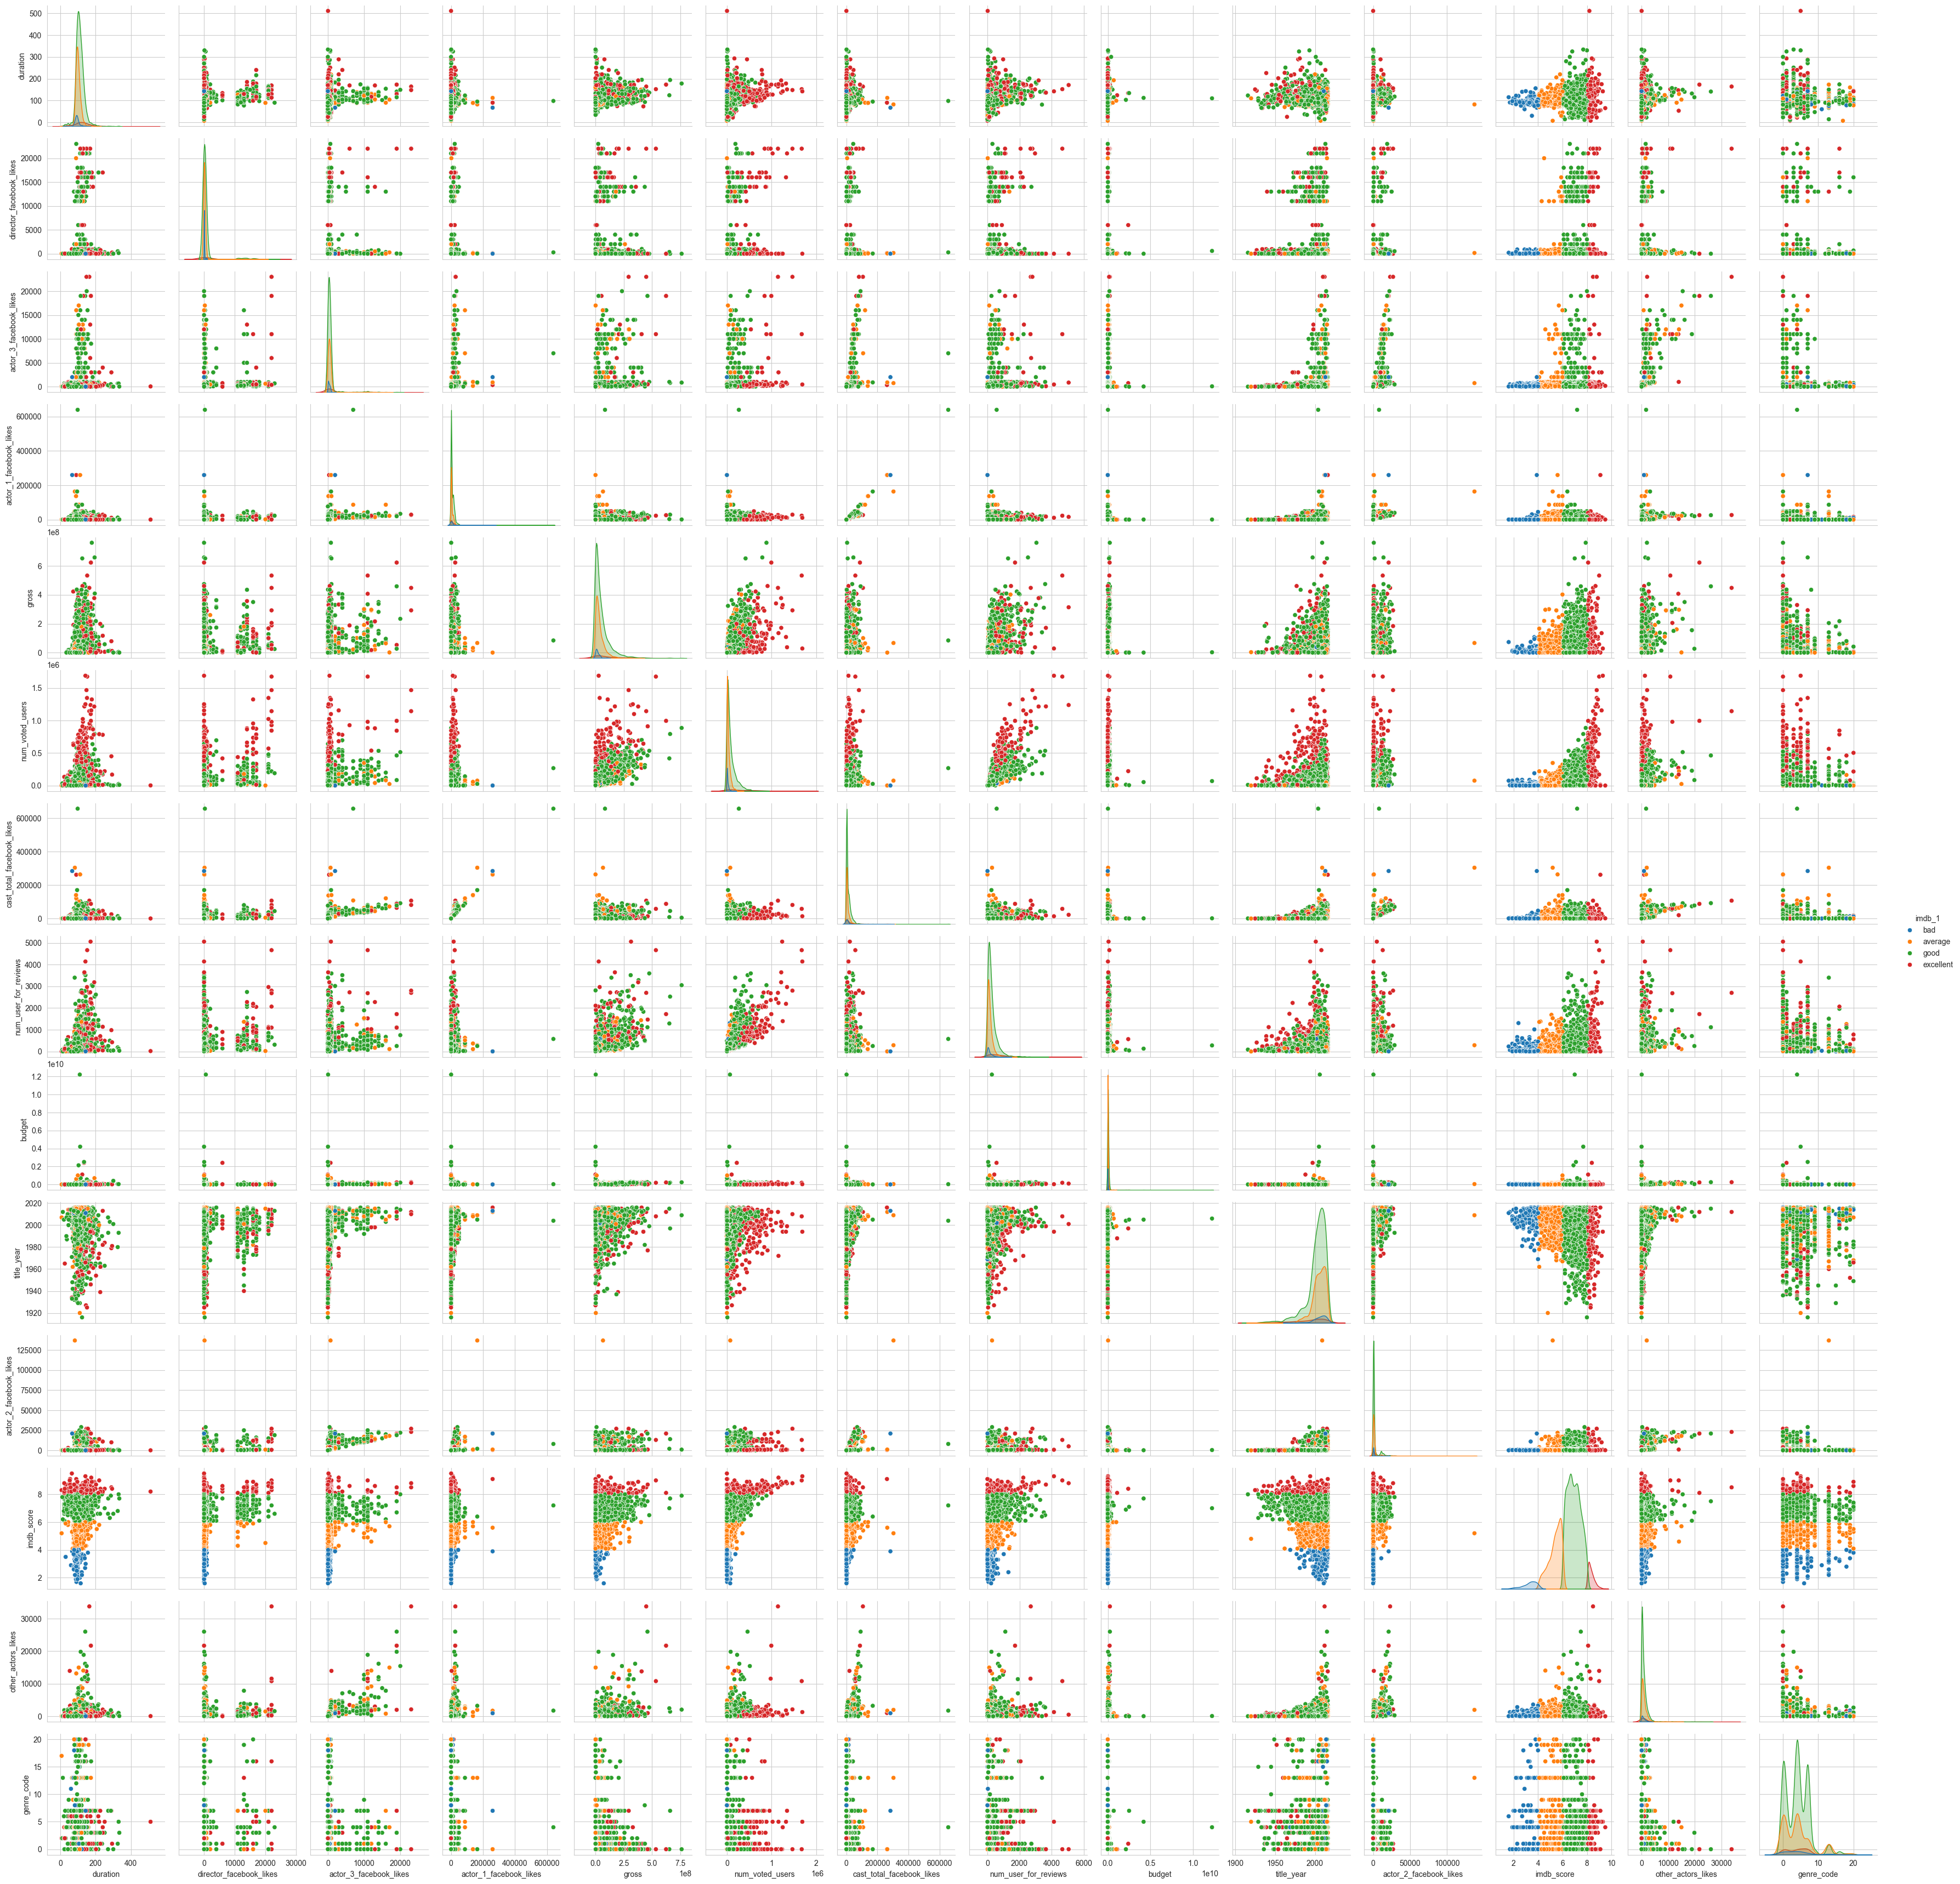

In [102]:
# df = df.dropna()
sns.pairplot(df, hue='imdb_1')

<Axes: xlabel='num_voted_users'>

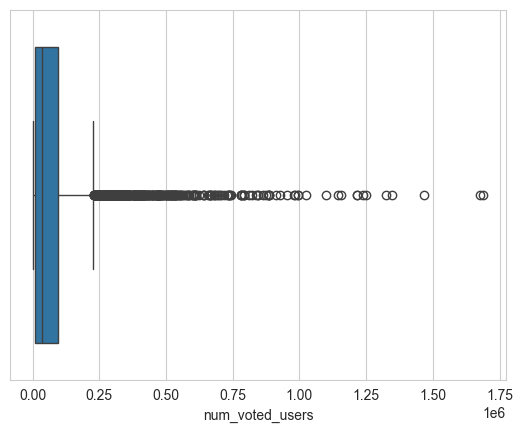

In [103]:
sns.boxplot(x='num_voted_users', data=df)

<Axes: xlabel='duration'>

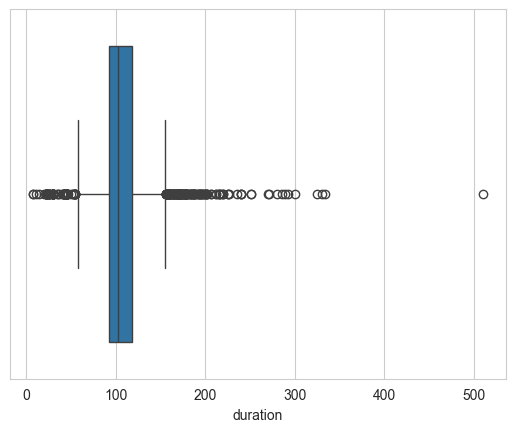

In [104]:
sns.boxplot(x='duration', data=df)

<Axes: xlabel='gross'>

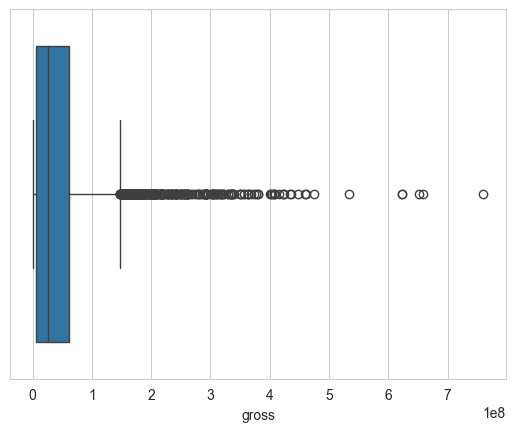

In [105]:
sns.boxplot(x='gross', data=df)

<Axes: xlabel='director_facebook_likes'>

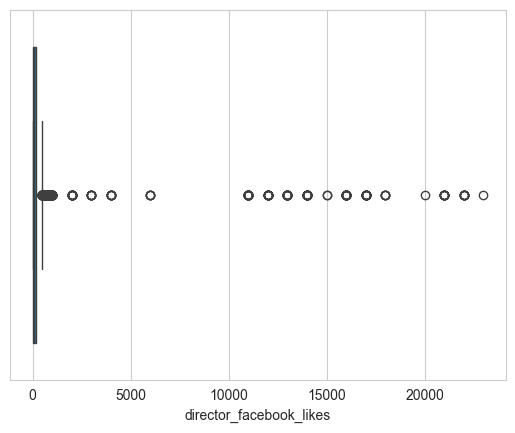

In [106]:
sns.boxplot(x='director_facebook_likes', data=df)

<Axes: xlabel='budget'>

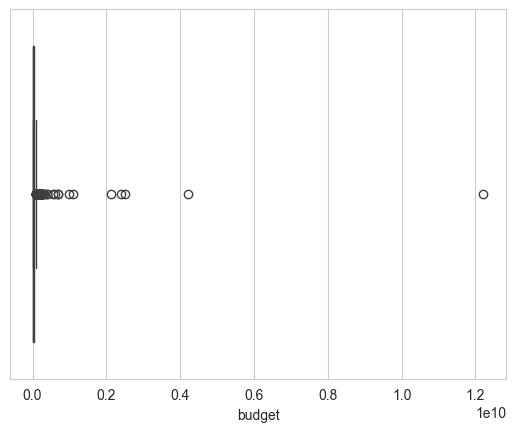

In [107]:
sns.boxplot(x='budget', data=df)

<Axes: xlabel='genre_code'>

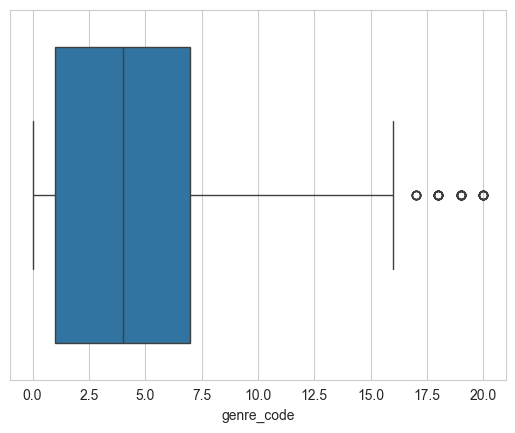

In [108]:
sns.boxplot(x='genre_code', data=df)

<Axes: xlabel='other_actors_likes'>

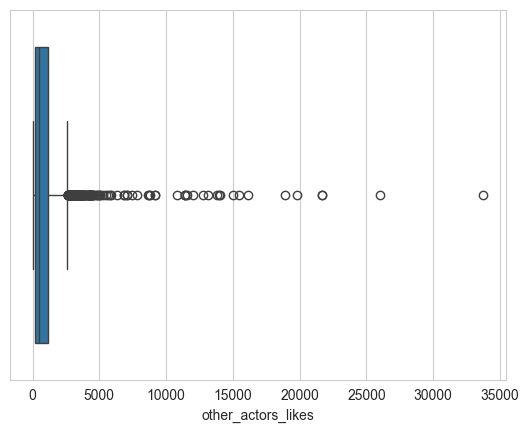

In [109]:
sns.boxplot(x='other_actors_likes', data=df)

In [161]:
sc = StandardScaler()

df.dropna(inplace=True)

sc.fit(df[['duration', 'director_facebook_likes', 'other_actors_likes', 'genre_code', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget']])

X = np.array(sc.transform(df[['duration', 'director_facebook_likes', 'other_actors_likes', 'genre_code', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget']]))
Y = np.array(df['imdb_score']).ravel()
Y2 = np.array(df['gross']).ravel()
Y3 = np.array(df['imdb_1']).ravel()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
x2_train, x2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.25, random_state=0)
x3_train, x3_test, y3_train, y3_test = train_test_split(X, Y3, test_size=0.25, random_state=0)


In [68]:
x_train.shape

(2885, 12)

In [69]:
y_train.shape

(2885,)

In [70]:
x_test.shape

(962, 12)

In [71]:
y_test.shape

(962,)

In [72]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
linreg2 = linear_model.LinearRegression()
linreg2.fit(x2_train, y2_train)

pred = linreg.predict(x_test)
LR = r2_score(y_test, pred)
pred2 = linreg2.predict(x2_test)
LR2 = r2_score(y2_test, pred2)

print("Linear Regression RATING ACCURACY: ", LR)
print("Linear Regression GROSS ACCURACY: ", LR2)

Linear Regression RATING ACCURACY:  0.2845719371623735
Linear Regression GROSS ACCURACY:  1.0


In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs = PolynomialFeatures(degree=3)
x_poly = poly_regs.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, Y)

poly_regs2 = PolynomialFeatures(degree = 3)
x_poly2 = poly_regs2.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly2, Y2)

PRpred = lin_reg.predict(x_poly)
PR = r2_score(Y, PRpred)
PRpred2 = lin_reg2.predict(x_poly2)
PR2 = r2_score(Y2, PRpred2)

print("Polynomial Regression RATING ACCURACY: ", PR)
print("Polynomial Regression GROSS ACCURACY: ", PR2)

Polynomial Regression RATING ACCURACY:  0.5156056232372525
Polynomial Regression GROSS ACCURACY:  1.0


In [74]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
DTpred = dtree.predict(x_test)
dtree2 = DecisionTreeRegressor()
dtree2.fit(x2_train, y2_train)
DTpred2 = dtree2.predict(x2_test)

DTresult = r2_score(y_test, DTpred)
DTresult2 = r2_score(y2_test, DTpred2)

print("Rating Decision Tree Accuracy: ", DTresult)
print("Gross Decision Tree Accuracy: ", DTresult2)

Rating Decision Tree Accuracy:  0.014340991367160494
Gross Decision Tree Accuracy:  0.9990920603249822


In [75]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=0)
RF.fit(x_train, y_train)
RFpred = RF.predict(x_test)

RF2 = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=0)
RF2.fit(x2_train, y2_train)
RFpred2 = RF2.predict(x2_test)

RFresult = r2_score(y_test, RFpred)
RFresult2 = r2_score(y2_test, RFpred2)

print("Rating Random Forest Accuracy: ", RFresult)
print("Gross Random Forest Accuracy: ", RFresult2)

Rating Random Forest Accuracy:  0.523473047123787
Gross Random Forest Accuracy:  0.9987966705361125


In [76]:
# from sklearn.model_selection import GridSearchCV as gsv
# from sklearn.svm import SVR

# params = {'C': [0.1, 1, 10, 100], 
#           'gamma': [1, 0.1, 0.01, 0.001], 
#           'kernel': ['rbf', 'linear', 'sigmoid']}
# # , 1000
# # , 0.0001
# grid = gsv(SVR(), params, refit=True, verbose=3)
# grid.fit(x_train, y_train)


In [77]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1, gamma=1)
svr.fit(x_train, y_train)
rate_svr = svr.predict(x_test)
SVMscore = r2_score(y_test, rate_svr)

svr2 = SVR(kernel='linear', C=1000, gamma=1)
svr2.fit(x2_train, y2_train)
gross_svr = svr2.predict(x2_test)
SVMscore2 = r2_score(y2_test, gross_svr)

print("Rating SVM Accuracy: ", SVMscore)
print("Gross SVM Accuracy: ", SVMscore2)

Rating SVM Accuracy:  0.4088509743604426
Gross SVM Accuracy:  -0.0025901349278023567


In [137]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

y_train_discrete = np.round(y_train)
y_test_discrete = np.round(y_test)
y2_train_discrete = np.round(y2_train)
y2_test_discrete = np.round(y2_test)

clf = MLPClassifier(random_state=1, max_iter=3000)
clf2 = MLPClassifier(random_state=1, max_iter=3000)
clf.fit(x_train, y_train_discrete)
clf2.fit(x_train, y2_train_discrete)

proba = clf.predict_proba(x_test)
predictions = clf.predict(x_test)
proba2 = clf2.predict_proba(x_test)
predictions2 = clf2.predict(x_test)

accuracy1 = clf.score(x_test, y_test_discrete)
accuracy2 = clf2.score(x_test, y2_test_discrete)

print("Rating MLPClassifier Accuracy:", accuracy1)
print("Gross MLPClassifier Accuracy:", accuracy2)

Rating MLPClassifier Accuracy: 0.525987525987526
Gross MLPClassifier Accuracy: 0.038461538461538464


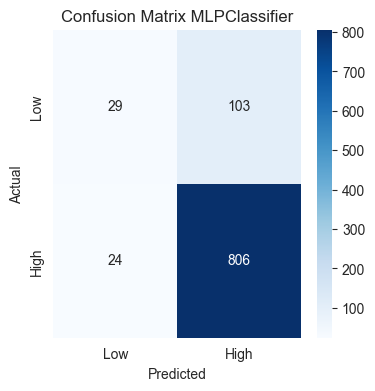

In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#For MLPClassifier
y_pred_rating = logreg.predict(x_test)
y_test_binary = np.where(y_test_discrete > 5, 1, 0)
y_pred_binary = np.where(predictions > 5, 1, 0)

cf_rating = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(4, 4))
sns.heatmap(cf_rating, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix MLPClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

y_train_classes = np.round(y_train)
y_test_classes = np.round(y_test)
y2_train_classes = np.round(y2_train)
y2_test_classes = np.round(y2_test)

logreg = LogisticRegression()
logreg2 = LogisticRegression()
logreg.fit(x_train, y_train_classes)
logreg2.fit(x2_train, y2_train_classes)

accuracyR = logreg.score(x_test, y_test_classes)
accuracyG = logreg2.score(x2_test, y2_test_classes)
print("Rating Logistic Regression Accuracy:", accuracyR)
print("Gross Logistic Regression Accuracy:", accuracyG)

Rating Logistic Regression Accuracy: 0.49376299376299376
Gross Logistic Regression Accuracy: 0.018711018711018712


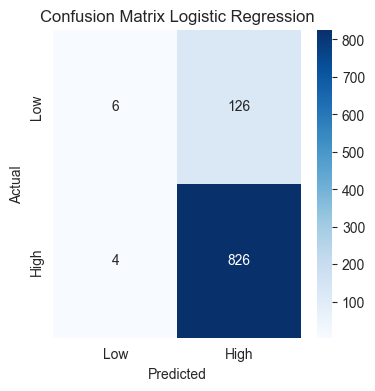

In [181]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#For Logistic Regression
y_pred_rating = logreg.predict(x_test)
y_test_binary = np.where(y_test_classes > 5, 1, 0)
y_pred_binary = np.where(y_pred_rating > 5, 1, 0)

cf_rating = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(4, 4))
sns.heatmap(cf_rating, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [124]:
accuracy = [LR + LR2, PR + PR2, DTresult + DTresult2, RFresult + RFresult2, SVMscore + SVMscore2, accuracy1 + accuracy2, accuracyR + accuracyG]

model = ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest', 'SVM', 'MLPClassifier', 'Logistic Regression']

/var/folders/_1/lyk3dfzd6l5g7c9s_hwh78j00000gn/T/ipykernel_1278/2940520397.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy, y=model, palette='viridis')


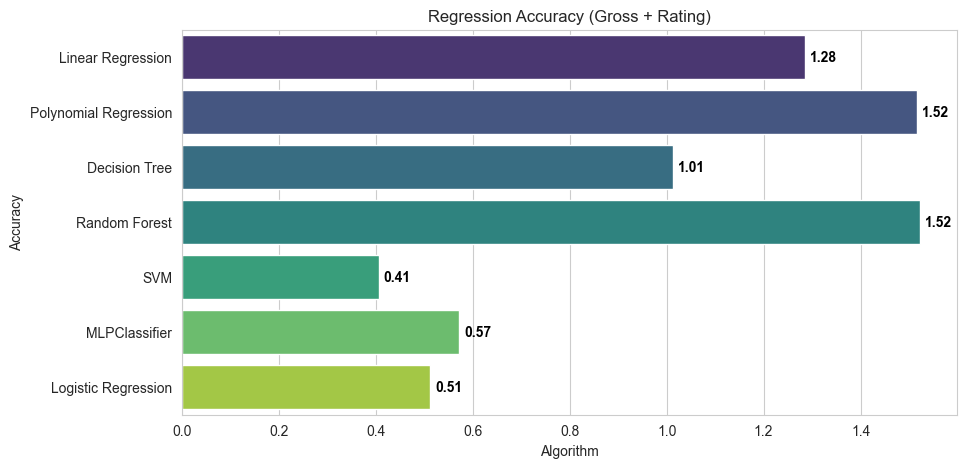

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=[10,5])
plt.title('Regression Accuracy (Gross + Rating)')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x=accuracy, y=model, palette='viridis')

for i, v in enumerate(accuracy):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', color='black', fontweight='bold')

plt.show()


In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = []

models.append(("K-Nearest Neighbor: ", KNeighborsClassifier(n_neighbors = 28)))
models.append(("Decision Tree: ", DecisionTreeClassifier()))
models.append(("Random Forest: ", RandomForestClassifier(n_estimators = 1000)))
models.append(("Support Vector Machines: linear", SVC(kernel='linear')))
models.append(("Support Vector Machine: rbh", SVC(kernel = 'rbf', C = 1, gamma = 0.1)))
models.append(("Naive Bayes: Gaussian", GaussianNB()))
models.append(("Naive Bayes: Bernoulli", BernoulliNB()))
models.append(("MLPClassifier", clf))
models.append(("MLPClassifier", clf2))
models.append(("Logistic Regression", logreg))
models.append(("Logistic Regression", logreg2))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 10, shuffle = True)
    cv_result = cross_val_score(model, x_train, y3_train.ravel(), cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i], results[i].mean()*100)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

K-Nearest Neighbor:  69.73844194540561
Decision Tree:  66.47983948481352
Random Forest:  75.11269703960015
Support Vector Machines: linear 68.38655805459439
Support Vector Machine: rbh 73.45275855440214
Naive Bayes: Gaussian 27.45013936947328
Naive Bayes: Bernoulli 57.81730584390618
MLPClassifier 74.66070742022299
MLPClassifier 75.00997212610535
Logistic Regression 70.36596501345636
Logistic Regression 70.08698577470204


In [85]:
predictions = clf.predict(x_test)
predictions

array([7., 6., 7., 4., 6., 6., 7., 7., 6., 6., 8., 6., 6., 6., 4., 7., 6.,
       6., 6., 6., 8., 7., 6., 6., 7., 6., 7., 6., 6., 7., 7., 7., 7., 6.,
       6., 7., 7., 6., 7., 6., 8., 6., 7., 6., 6., 7., 7., 6., 5., 6., 8.,
       6., 5., 6., 7., 6., 6., 6., 7., 6., 6., 7., 7., 7., 6., 7., 8., 6.,
       6., 6., 7., 7., 6., 6., 8., 8., 8., 6., 7., 7., 6., 6., 6., 8., 7.,
       7., 6., 6., 8., 8., 6., 6., 7., 7., 6., 6., 6., 6., 6., 6., 8., 6.,
       6., 6., 6., 7., 7., 6., 7., 5., 7., 6., 6., 6., 6., 6., 8., 7., 6.,
       6., 6., 7., 5., 6., 6., 7., 7., 7., 6., 7., 6., 6., 6., 4., 7., 6.,
       7., 7., 6., 6., 6., 7., 8., 6., 7., 6., 6., 6., 8., 7., 6., 7., 6.,
       7., 7., 6., 6., 6., 7., 6., 7., 7., 7., 4., 6., 5., 6., 7., 6., 7.,
       6., 6., 6., 7., 8., 7., 5., 8., 7., 7., 6., 6., 7., 7., 6., 7., 7.,
       6., 6., 6., 7., 8., 7., 8., 6., 6., 6., 7., 7., 7., 7., 6., 7., 8.,
       8., 7., 8., 6., 6., 6., 4., 8., 7., 7., 6., 8., 4., 6., 8., 7., 7.,
       6., 8., 6., 7., 6.

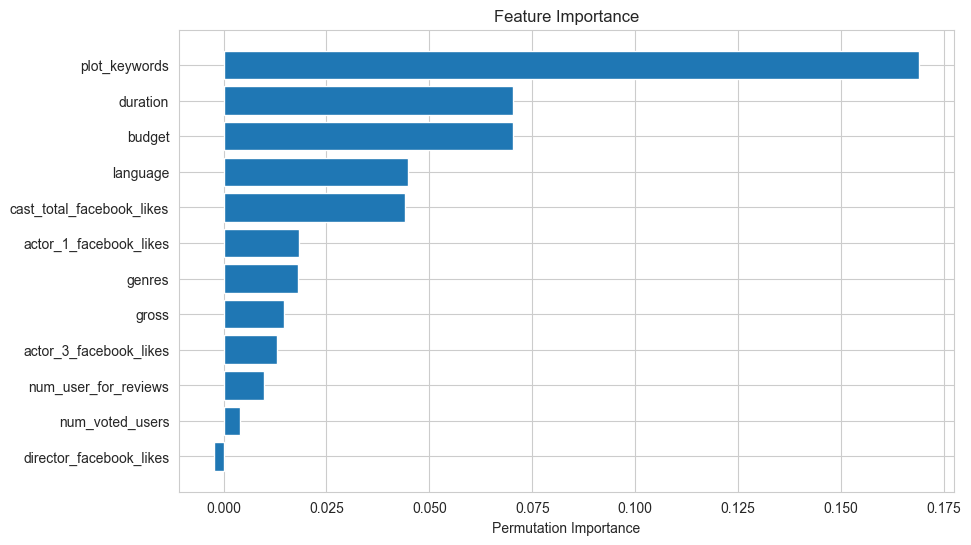

In [86]:
from sklearn.inspection import permutation_importance

# Feature importance for the MLPClassifier
result = permutation_importance(clf, x_test, y_test_discrete, n_repeats=10, random_state=42)
feature_importance = result.importances_mean

plt.figure(figsize=(10, 6))
sorted_idx = feature_importance.argsort()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df.columns)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()


In [87]:
reg = MLPClassifier(hidden_layer_sizes=(5*3, 2), activation="relu" ,solver='adam',random_state=1, max_iter=2000)
reg.fit(x_train, y_train)

y_train_pred=pd.DataFrame(reg.predict(x_train))
y_test_pred=pd.DataFrame(reg.predict(x_test))

train_classification_report = metrics.classification_report(y_train.astype(int), y_train_pred.astype(int))
test_classification_report = metrics.classification_report(y_test.astype(int), y_test_pred.astype(int))

print("Training Classification Report:\n", train_classification_report)
print("\nTesting Classification Report:\n", test_classification_report)

cf=metrics.confusion_matrix(y_test,y_test_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues',xticklabels=['High Rating','Low Rating'],yticklabels=['High Rating','Low Rating'])
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

ValueError: Unknown label type: (array([6.5, 7.5, 5.5, ..., 6.3, 5.1, 6. ]),)